In [ ]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [ ]:
data = pd.read_csv(r'/content/creditcard.csv',on_bad_lines='skip')
# data=data.iloc[1:50000,]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [ ]:
## input layer 
input_layer = Input(shape=(x.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(x.shape[1], activation='relu')(decoded)

In [ ]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [ ]:
history=autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split =0.20);

Epoch 1/10
7/7 [==============================] - 1s 36ms/step - loss: 0.2452 - val_loss: 0.2438
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2448 - val_loss: 0.2434
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2444 - val_loss: 0.2429
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2440 - val_loss: 0.2425
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2435 - val_loss: 0.2421
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2431 - val_loss: 0.2417
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2427 - val_loss: 0.2412
Epoch 8/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2422 - val_loss: 0.2408
Epoch 9/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2418 - val_loss: 0.2404
Epoch 10/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2413 - val_loss: 0.2399


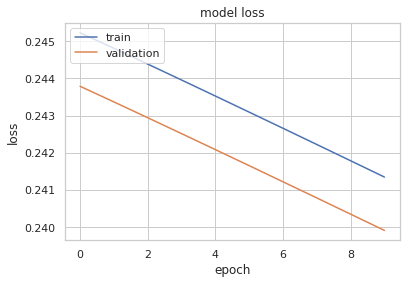

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
hid_rep = Sequential()
hid_rep .add(autoencoder.layers[0])
hid_rep .add(autoencoder.layers[1])
hid_rep .add(autoencoder.layers[2])

In [ ]:
norm_hid_rep = hid_rep .predict(x_norm[:3000])
fraud_hid_rep = hid_rep .predict(x_fraud)

16/16 [==============================] - 0s 2ms/step


In [ ]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,131322.0,-0.469678,0.664138,-0.454818,-0.088011,0.171895,0.377215,2.261368,-0.807091,0.607520,...,-0.365171,-0.201331,-0.015075,0.305929,-0.564569,-0.074338,-0.290249,-0.329507,253.92,0
1,63095.0,0.970482,-0.847493,0.595211,0.567191,-0.826490,0.599934,-0.596635,0.183025,-0.931399,...,-0.232898,-0.343392,-0.126469,-0.317010,0.353549,-0.319808,0.060416,0.042538,145.42,0
2,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30,1
3,30763.0,1.502916,-0.410908,0.010381,-0.998518,-0.360623,-0.212083,-0.519417,-0.153563,-0.803499,...,-0.178176,-0.581688,-0.050204,-1.005451,0.449193,-0.396493,0.014454,0.010673,10.00,0
4,58251.0,-1.053308,0.588041,0.497243,0.514123,-0.243353,-1.143231,0.516954,0.188210,-0.619711,...,0.128897,0.083167,0.014889,0.415131,-0.413715,0.457807,-0.151270,0.062739,72.98,0


In [ ]:
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


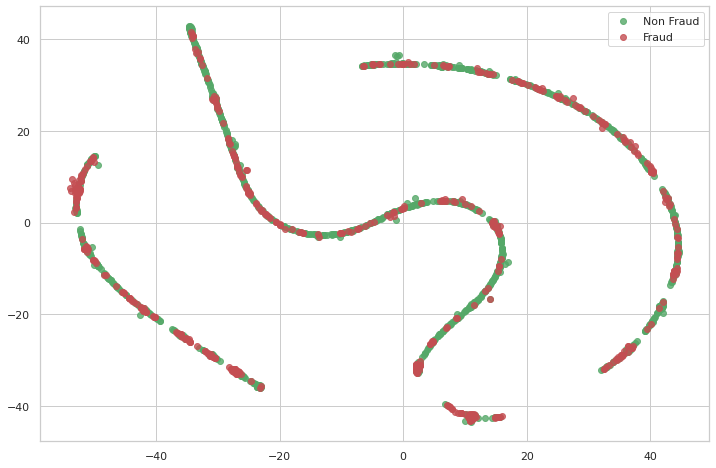

In [ ]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


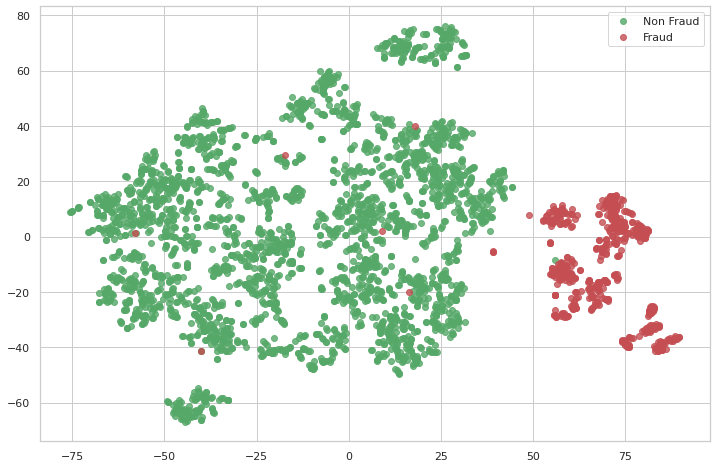

In [ ]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression().fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


confusion_matrixt: 
[[741   1]
 [ 21 110]]

Accuracy Score:  0.9747995418098511


In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x, train_y)
pred_y = svclassifier.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


confusion_matrixt: 
[[762   0]
 [  5 106]]

Accuracy Score:  0.9942726231386025
